# 加载Matplotlib库

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 高级功能
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LinearLocator

检查配置文件（需要重启Kernel）

In [2]:
matplotlib.matplotlib_fname()

'/home/jovyan/.config/matplotlib/matplotlibrc'

In [3]:
# plt.style.use('bmh')

# Matplotlib基础

In [4]:
np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

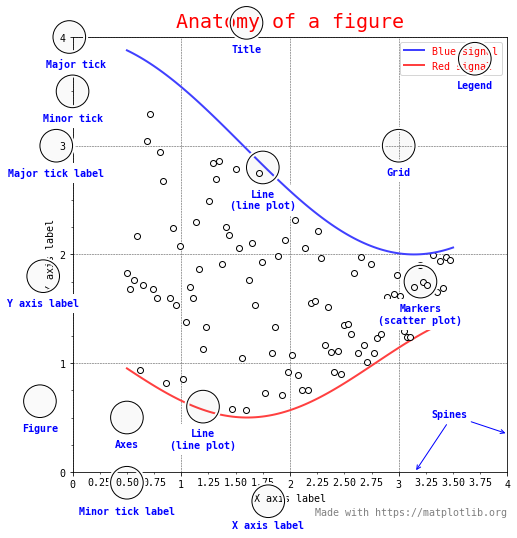

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# FuncFormatter is created and used automatically
ax.xaxis.set_minor_formatter(minor_tick)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label='Blue signal', zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label='Red signal')
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()

def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with https://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# 基本绘图

以下例子取自《Data Science from Scratch, 2nd Edition》

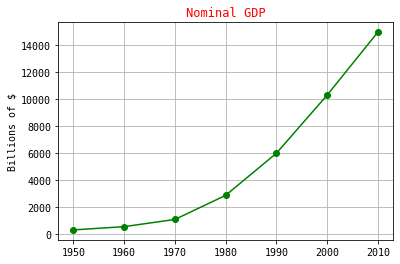

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

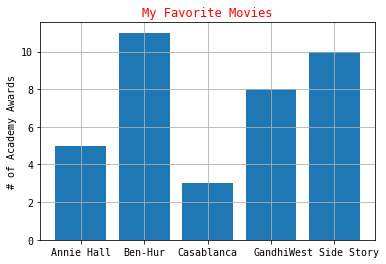

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

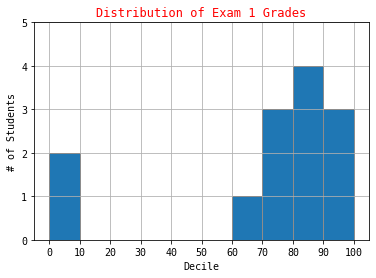

In [8]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

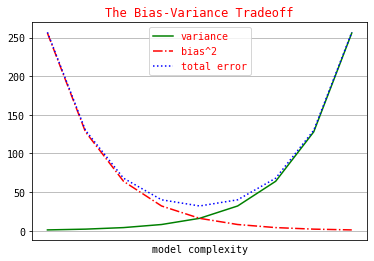

In [9]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

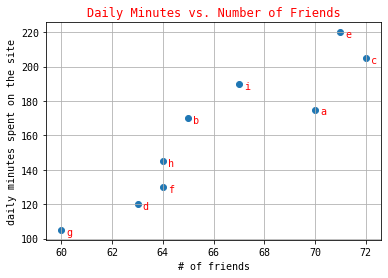

In [10]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

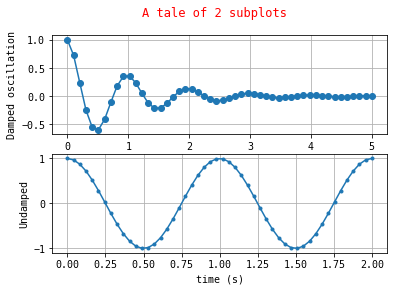

In [11]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

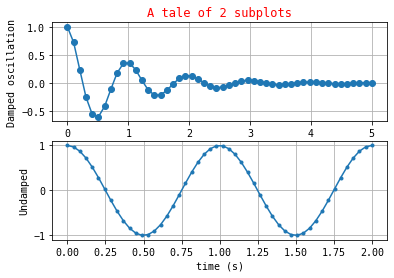

In [12]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

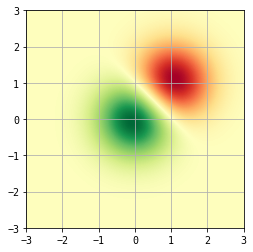

In [13]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

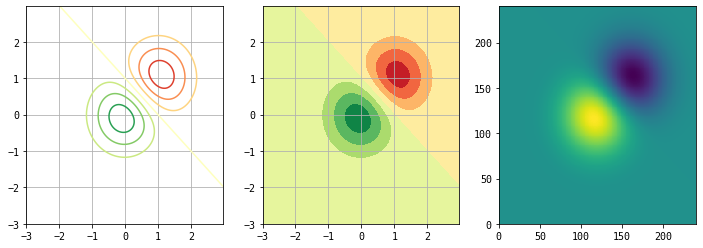

In [14]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1)
plt.contour(x, y, Z, cmap=cm.RdYlGn)

plt.subplot(1, 3, 2)
plt.contourf(x, y, Z, cmap=cm.RdYlGn)

plt.subplot(1, 3, 3)
plt.pcolormesh(Z)

plt.show()

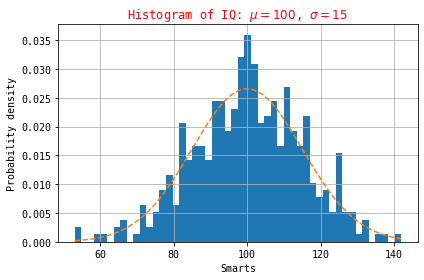

In [15]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

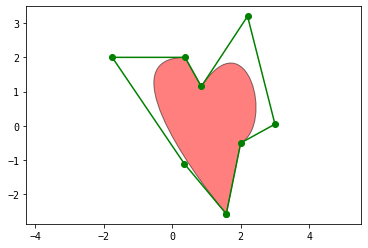

In [16]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

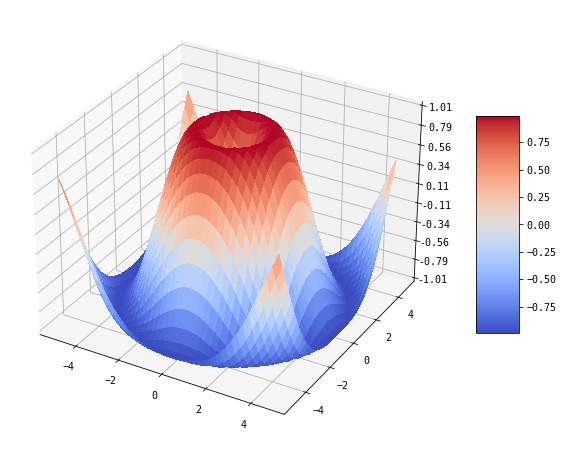

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.05)

plt.show()

# 与Cartopy配合

In [18]:
import cartopy.crs as ccrs
from cartopy.feature import COASTLINE

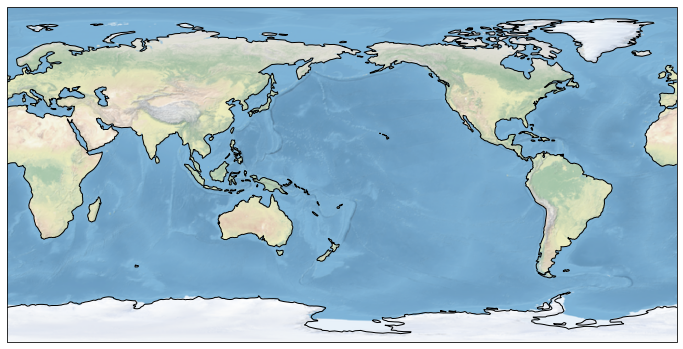

In [19]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()
ax.coastlines()
plt.show()

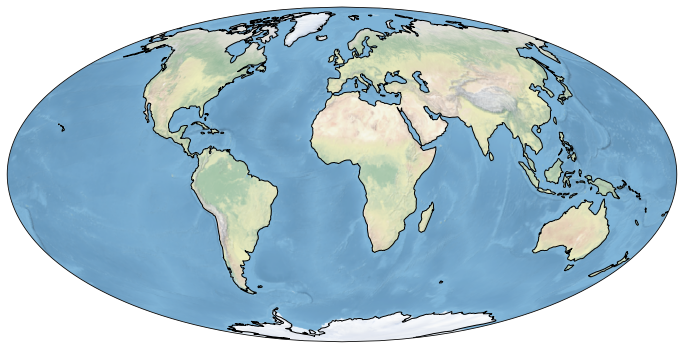

In [20]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines()

## 使用Xarray加载数据

In [21]:
import xarray as xr

In [22]:
ds = xr.open_dataset('samples/gfs.20201117/00/gfs.t00z.pgrb2.1p00.f000', engine='cfgrib',
                     backend_kwargs={'filter_by_keys':{'typeOfLevel': 'surface'}})
print(ds)

Ignoring index file '/home/jovyan/work/python-tutorial/data/samples/gfs.20201117/00/gfs.t00z.pgrb2.1p00.f000.90c91.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (latitude: 181, longitude: 360)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     int64 ...
  * latitude    (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
    valid_time  datetime64[ns] ...
Data variables:
    vis         (latitude, longitude) float32 ...
    gust        (latitude, longitude) float32 ...
    hindex      (latitude, longitude) float32 ...
    sp          (latitude, longitude) float32 ...
    orog        (latitude, longitude) float32 ...
    t           (latitude, longitude) float32 ...
    sdwe        (latitude, longitude) float32 ...
    sde         (latitude, longitude) float32 ...
    cpofp       (latitude, longitude) float32 ...
    prate       (latitude, longitude) float32 ...
    csnow       (latitude, longitude) float32 ...
    cicep       (latitude, longitude) float32 ...
    cfrzr       (

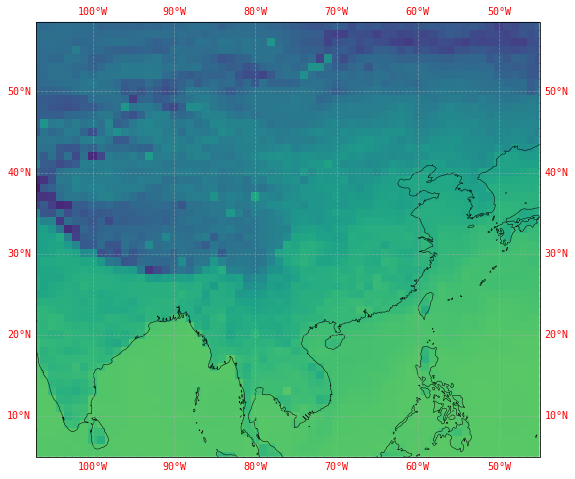

In [24]:
plt.figure(figsize=(12, 8))
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_extent([73, 135, 5, 55])
ax.pcolormesh(ds.longitude, ds.latitude, ds.t, transform=ccrs.PlateCarree())
ax.gridlines(crs=proj, draw_labels=True, alpha=0.5, linestyle='--')
ax.add_feature(COASTLINE.with_scale('50m'), linewidth=0.5)
plt.show()